In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from qetpy import Noise
from qetpy.sim import TESnoise
from qetpy.plotting import compare_noise, plot_noise_sim


### Load data

In [ ]:
# data_tl = np.loadtxt('wavedumpdata/wavedump_1000.txt', dtype='int')
# np.save('wavedumpdata/wavedump_Tl.npy', data_tl)      
# noise_tl = np.loadtxt('wavedumpdata_noise/wavedump_noise_21-05-27_12-46-42.txt', dtype='int')
# np.save('wavedumpdata/wavedump_noise_Tl.npy', noise_tl)   
# noise_tl_1 = np.loadtxt('wavedumpdata_noise/wavedump_run11_wavedumptest_21-04-16_16-06-57.txt', dtype='int')
# np.save('wavedumpdata/wavedump_noise_Tl_1.npy', noise_tl_1)        

### Process data

In [52]:
traces_noise = np.load('wavedumpdata/wavedump_noise_Tl_1.npy')
# try:
#     noise_reshape_1 = traces_noise_1.reshape(int(np.floor(len(traces_noise_1)/15000)),15000)
# except ValueError:
#     traces_noise_1 = traces_noise_1[:int(np.floor(len(traces_noise_1)/15000))*15000,]
#     noise_reshape_1 = traces_noise_1.reshape(int(np.floor(len(traces_noise_1)/15000)),15000)
    
# noise_mean_1 = np.expand_dims(noise_reshape_1[:,100:2000].mean(axis=1), axis=1)
# noise_1= noise_reshape_1-noise_mean_1
# np.save('wavedumpdata/wavedump_noise_Tl_processed_1.npy', noise_1)
# print (noise_1.shape, noise_1[20].shape)

# traces_noise = np.load('wavedumpdata/wavedump_noise_Tl_processed_1.npy')

In [53]:
traces_noise_o = np.load('wavedumpdata/wavedump_noise_Tl.npy')

# try:
#     noise_reshape = traces_noise.reshape(int(np.floor(len(traces_noise)/15000)),15000)
# except ValueError:
#     traces_noise = traces_noise[:int(np.floor(len(traces_noise)/15000))*15000,]
#     noise_reshape = traces_noise.reshape(int(np.floor(len(traces_noise)/15000)),15000)
# noise_mean = np.expand_dims(noise_reshape[:,100:2000].mean(axis=1), axis=1)
# noise= noise_reshape-noise_mean
# np.save('wavedumpdata/wavedump_noise_Tl_processed.npy', noise)
# print (noise.shape, noise[20].shape)

# traces_noise_o = np.load('wavedumpdata/wavedump_noise_Tl_processed.npy')

In [54]:
# traces_data = np.load('wavedumpdata/wavedump_Tl.npy')

# try:
#     data_reshape = traces_data.reshape(int(np.floor(len(traces_data)/15000)),15000)
# except ValueError:
#     traces_data = traces_data[:int(np.floor(len(traces_data)/15000))*15000,]
# data_mean = np.expand_dims(data_reshape[:,100:2000].mean(axis=1), axis=1)
# data= data_reshape-data_mean
# np.save('wavedumpdata/wavedump_data_Tl_processed.npy', data)
# print (data.shape, data[20].shape)

traces_data = np.load('wavedumpdata/wavedump_data_Tl_processed.npy')

In [ ]:
print (len(traces_noise)/15000)

## Noise - PSD

In [ ]:

    # traces : ndarray (# of traces, # of channels, # of bins)
    # Array of the traces to use in the noise analysis. Should be shape 

In [101]:
Traces_noise= traces_noise[:500*15000]
print (Traces_noise.shape)
Traces_noise = Traces_noise.reshape(500,1,15000)
print (Traces_noise.shape)

(7500000,)
(500, 1, 15000)


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:

fs = 500e6 #define sample rate
channels = [ 'Channel' ] #define the channel names
tl_noise = Noise(traces=Traces_noise,
                   fs=fs, 
                   channames=channels,
                   name= 'Testing CsI_Tl') #initialize a noise object
# Noise?

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:

tl_noise.calculate_psd()
tl_noise.save('noise')
# If there is more than one channel, one can do correlations (below)
# tl_noise.calculate_corrcoeff()
# tl_noise.calculate_csd()
# g124_noise.calculate_uncorr_noise()

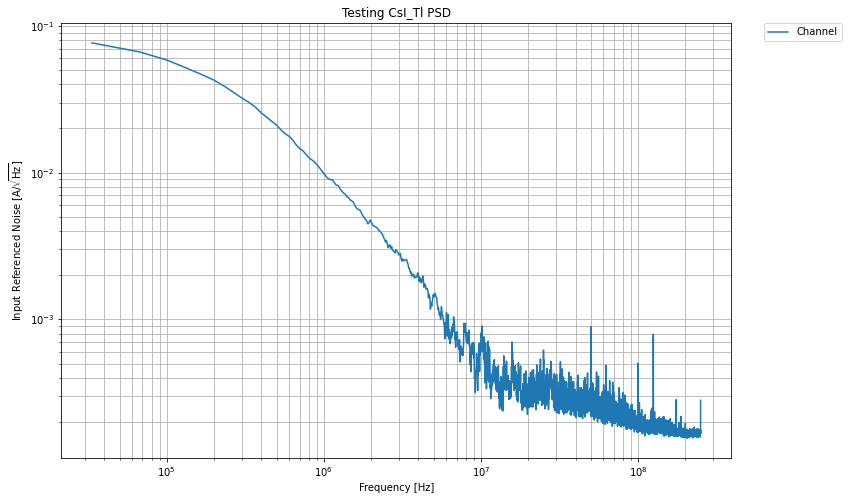

In [128]:
tl_noise.plot_psd(lgcoverlay=True)

# Optimum filter

In [111]:
import qetpy as qp
from pprint import pprint

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:

fs = 1/2e-9

# fftfreq : Return the Discrete Fourier Transform sample frequencies.
f = np.fft.fftfreq(15000, d=1/fs) # n=15000 : window length; d is sample spacing (in seconds)
print (f)
#noisesim = qp.sim.TESnoise(r0=0.03) # r0 : bias resistance of the TES in Ohms
noisesim = TESnoise(freqs = tl_noise.freqs[1:])

# s_iload : Johnson load current noise determined from the TES parameters for in transition.
psd_sim = noisesim.s_iload(freqs=f) + noisesim.s_ites(freqs=f) + noisesim.s_itfn(freqs=f) # freqs : frequencies for which we will calculate the noise simulation


[      0.           33333.33333333   66666.66666667 ... -100000.
  -66666.66666667  -33333.33333333]


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# create a template
# pulse_amp = 1e-6 # [A]
tau_f = 1.1e-6 # [s] fall time
tau_r = 0.05e-6 # [s] rise time

t = np.arange(len(psd_sim))/fs

pulse = np.exp(-t/tau_f)-np.exp(-t/tau_r)
pulse_shifted = np.roll(pulse, len(t)//2)
template = pulse_shifted/pulse_shifted.max()




# use the PSD to create an example trace to fit
# gen_noise : Function to generate noise traces with random phase from a given PSD. 
# noise = qp.gen_noise(psd_sim, fs=fs, ntraces=1)[0] # psd = psd_sim : The two-sided power spectral density that will be used to generate the noise.
#fs: Sample rate of the data being taken, assumed to be in units of Hz; ntraces : The number of noise traces that should be generated. 
# signal = noise + np.roll(template, 100)*pulse_amp # note the shift we have added, 160 us




In [114]:
signal = traces_data[20]
print(signal.shape)
print (len(psd_sim))

(15000,)
15000


In [115]:
OF = qp.OptimumFilter(signal, template, psd_sim, fs) # initialize the OptimumFilter class
amp_nodelay, chi2_nodelay = OF.ofamp_nodelay() 
# amp : The optimum amplitude calculated for the trace (in Amps); chi2 : The chi^2 value calculated from the optimum filter

amp, t0, chi2 = OF.ofamp_baseline(nconstrain=300)

amp_withdelay, t0_withdelay, chi2_withdelay = OF.ofamp_withdelay() # t0_withdelay : time shift calculated for the pulse (in s).

print(f"No Delay Fit: amp = {amp_nodelay*1e6:.2f} μA, χ^2 = {chi2_nodelay:.2f}")
print(f"With Delay Fit: amp = {amp_withdelay*1e6:.2f} μA, t_0 = {t0_withdelay*1e6} μs, χ^2 = {chi2_withdelay:.2f}")

No Delay Fit: amp = 26089457.78 μA, χ^2 = 163389999010005920828620800.00
With Delay Fit: amp = -1290432216.18 μA, t_0 = -7.680000000000001 μs, χ^2 = 161538429969150575862874112.00


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \m
<>:7: DeprecationWarning: invalid escape sequence \m
<ipython-input-132-e8d7413a6537>:7: DeprecationWarning: invalid escape sequence \m
  ax.set_xlabel("Time [$\mu$s]")


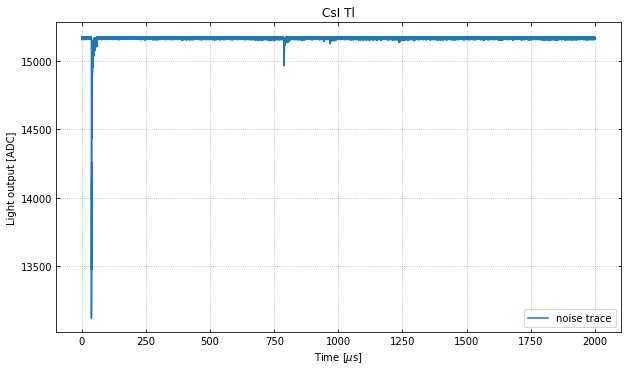

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(np.arange(len(signal))*2e-3, signal, label="Signal", color="blue", alpha=0.5)
ax.plot(np.arange(1000000)*2e-3, traces_noise[:1000000], label = "noise trace")
# ax.plot(np.arange(len(signal))*2e-3, amp_withdelay*np.roll(template, int(t0_withdelay*fs)), 
#         label="Trial fit - not yet optimized", color="red", linestyle="dotted")
ax.set_ylabel("Light output [ADC]")
ax.set_xlabel("Time [$\mu$s]")
# ax.set_yscale('log')
# ax.set_xlim(0,15000)
ax.set_title("CsI Tl")
lgd = ax.legend(loc="lower right")
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig = ax.get_figure()
fig.savefig("plots/Csi_fitted.png", dpi=200,  bbox_inches='tight')
fig.tight_layout()

In [ ]:
tl_noise.plot_psd(lgcoverlay=True)

In [ ]:
# pulse_amp = 1e-6
# tau_f = 160e-6
# tau_r = 20e-6
# tau_f = 1e-6 # [s] fall time
# tau_r = 0.05e-6 # [s] rise time

# t = np.arange(len(psd_sim))/fs

# pulse = np.exp(-t/tau_f)-np.exp(-t/tau_r)
# pulse_shifted = np.roll(pulse, len(t)//2)
# template = pulse_shifted/pulse_shifted.max()

# noise = qp.gen_noise(psd_sim, fs=fs, ntraces=1)[0]
# signal = noise + np.roll(template, 100)*pulse_amp



In [ ]:
print(fs)

In [ ]:
# OF.update_signal(signal) # update the signal in order to fit a new trace
# amp_withdelay, t0_withdelay, chi2_withdelay = OF.ofamp_withdelay(nconstrain=300)

# print(f"With Delay Fit: amp = {amp_withdelay*1e6:.2f} μA, t_0 = {t0_withdelay*1e6:.2f} μs, χ^2 = {chi2_withdelay:.2f}")

In [ ]:
nonlinof = qp.OFnonlin(psd_sim, fs, template=None)
params, error, _, chi2_nonlin, success = nonlinof.fit_falltimes(signal, npolefit=3, lgcfullrtn=True, lgcplot=True)
# params :  best fit parameters ; error : The corresponding fit errors for the best fit parameters ; 
# _ : The convariance matrix returned from the fit ; success : The success flag from scipy.optimize.curve_fit i.e True if the fit converged. 

In [ ]:
params

In [ ]:
print(f"Nonlinear fit: χ^2 = {chi2_nonlin * (len(nonlinof.data)-nonlinof.dof):.2f}")

[[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
    15   16   17   18   19   20   21   22   23   24   25   26   27   28
    29   30   31   32   33   34   35   36   37   38   39   40   41   42
    43   44   45   46   47   48   49   50   51   52   53   54   55   56
    57   58   59   60   61   62   63   64   65   66   67   68   69   70
    71   72   73   74   75   76   77   78   79   80   81   82   83   84
    85   86   87   88   89   90   91   92   93   94   95   96   97   98
    99  100]
 [ 101  102  103  104  105  106  107  108  109  110  111  112  113  114
   115  116  117  118  119  120  121  122  123  124  125  126  127  128
   129  130  131  132  133  134  135  136  137  138  139  140  141  142
   143  144  145  146  147  148  149  150  151  152  153  154  155  156
   157  158  159  160  161  162  163  164  165  166  167  168  169  170
   171  172  173  174  175  176  177  178  179  180  181  182  183  184
   185  186  187  188  189  190  191  192  193  194